## Purpose of Notebook

- Last update: 20 July 2021

Study Isolation Forest on toy dataset.

In [2]:
import matplotlib.pyplot as pl
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.ensemble import IsolationForest

import sys
sys.path.append('../src/')
from data_generator import ToyDataGenerator

In [3]:
n_samples = 300
n_features = 3
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

In [4]:
dgenerator = ToyDataGenerator(n_inliers, n_features)

In [5]:
X = dgenerator.feature_generator()
y = dgenerator.target_generator_independent(X, n_features)

Coefficients are []
indeces are []
Coefficients are [-1]
indeces are [0]
Coefficients are [ 0 -2]
indeces are [2 0]


In [6]:
X_outlier, y_outlier = dgenerator.outlier_generator(X, y)

In [8]:
X_all = np.r_[X, X_outlier]
y_all = np.r_[y, y_outlier]

In [7]:
iforest = IsolationForest()

### Application to just feature space

In [9]:
iforest.fit(X_all)

IsolationForest()

In [10]:
anml_predict = iforest.predict(X_all)

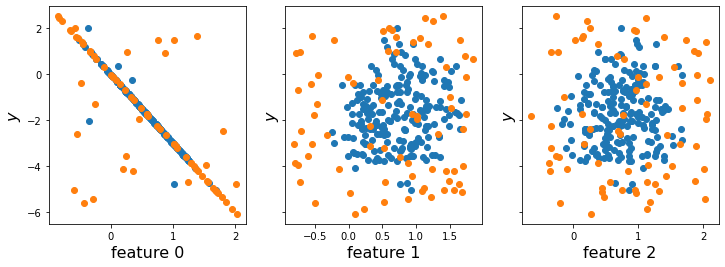

In [12]:
fig, ax = pl.subplots(1, X.shape[1], figsize=(4*X.shape[1],4), sharey=True)
for i in range(X.shape[1]):
    ax[i].scatter(X_all[anml_predict>0,i], y_all[anml_predict>0])
    ax[i].scatter(X_all[anml_predict<0,i], y_all[anml_predict<0])
    ax[i].set_xlabel(f'feature {i}', fontsize=16)
    ax[i].set_ylabel(r'$y$', fontsize=16)
#     ax[i].set_title(f"features{i}")

### Application to feature and target space together

In [13]:
anml_Xy_predict = iforest.fit_predict(np.c_[X_all, y_all])

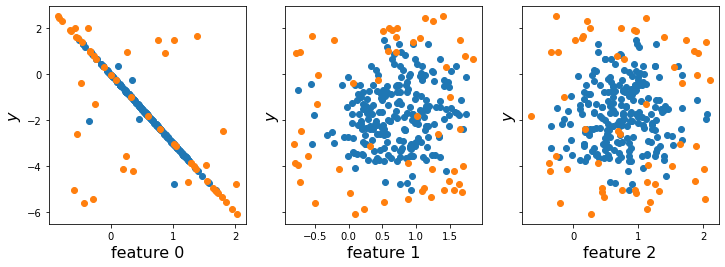

In [15]:
fig, ax = pl.subplots(1, X.shape[1], figsize=(4*X.shape[1],4), sharey=True)
for i in range(X.shape[1]):
    ax[i].scatter(X_all[anml_Xy_predict>0,i], y_all[anml_Xy_predict>0])
    ax[i].scatter(X_all[anml_Xy_predict<0,i], y_all[anml_Xy_predict<0])
    ax[i].set_xlabel(f'feature {i}', fontsize=16)
    ax[i].set_ylabel(r'$y$', fontsize=16)
#     ax[i].set_title(f"features{i}")